# Insper - Ciências dos Dados

### Projeto 1

### João Pedro Chacon Ruiz

### Turma A

<img src="NEA_logo.jpg" width=(2108) height=(1020) align=center> 
<h3 align="center">Figura 1: Logo da NEA</h3> 

## • Introdução •

A Agência de Energia Nuclear (ou NEA, sigla em inglês) é uma organização intergovernamental organizada pela OECD e cujo objetivo é ajudar os países membros a manter e incentivá-los a desenvolver e usufruir cada vez mais da energia nuclear de forma segura e ambieltalmente correta. 

A NEA é composta por 33 países espalhados pelos continentes, dentre os quais estão os EUA, a França, a Alemanha e outras potências mundias. Juntos, os países membros são responsáveis por aproximadamente 85% da energia nuclear no mundo.

## • Hipótese e mecanismo •

Tendo em vista a relevância que os países membros da NEA tem para a energia nuclear mundial, a hipótese é que **países que entram na NEA aumentam significantemente a sua produção de energia nuclear.**

Para tentar validar tal hipótese, serão analisados dados do Japão, que entrou na NEA em 1972, e do Canadá, que ingressou em 1975, em comparação com dados de um país não integrante da organização. A escolha do Japão e do Canadá como países a serem analisados na validação pode ser justificada por dois motivos principais:

> Data de ingresso muito próxima, com 3 anos de diferença;

> Valores de produção de energia nuclear no início do período analisado próximos.

Quanto aos países que serão usados para comparação, os escohidos foram a Índia e a Argentina por alguns fatores. Dentre os países não integrantes:

> São os únicos com dados relevantes desde 1971;

> São os 2 países que têm a quantia de energia nuclear produzida mais próxima às quantias do Japão e do Canadá. 

Vale notar que parte dos dados utilizados são da década de 1970, um período marcado pela crise do petróleo, o que pode influenciar diretamente a análise de resultados, já que ambos estão relacionados a formas de obtenção de energia. Por isso, ao longo do projeto, o impacto da crise do petróleo também será analisada.

## • Imports •

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from numpy import percentile
import numpy as np

## • Filtragem e leitura de dados •

**Dados sobre a produção de energia nuclear de cada país por ano (TOE)**

In [3]:
dados_nuclear = pd.read_excel('nuclear_energy.xlsx')
dados_nuclear.head(30)

,"Nuclear production, total (toe)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
nuc = dados_nuclear.set_index('Nuclear production, total (toe)')
nuc.index.names = ['country']
nuc = nuc.iloc[:,11:25]
nuc

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Algeria,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
nuc = nuc[~nuc[1971].isin(['NaN'])]
nuc = nuc.sort_values(by=1971, ascending=False)
nuc

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,
United States,3.486844e+06,4.971023e+06,7.666982e+06,1.042571e+07,1.577919e+07,1.741788e+07,2.286638e+07,2.519235e+07,2.325572e+07,2.288762e+07,2.485245e+07,2.577291e+07,2.676681e+07,2.986174e+07
United Kingdom,2.368702e+06,2.526053e+06,2.407309e+06,2.890542e+06,2.608598e+06,3.108770e+06,3.441187e+06,3.200688e+06,3.293895e+06,3.183405e+06,3.264746e+06,3.780911e+06,4.293035e+06,4.641359e+06
France,8.027515e+05,1.254686e+06,1.267498e+06,1.263543e+06,1.569046e+06,1.356664e+06,1.546518e+06,2.621066e+06,3.435942e+06,5.266638e+06,9.056406e+06,9.365348e+06,1.240421e+07,1.644316e+07
Japan,6.878762e+05,8.168530e+05,8.346518e+05,1.693809e+06,2.160361e+06,2.930267e+06,2.722184e+06,5.100000e+06,6.052709e+06,7.101548e+06,7.551161e+06,8.807395e+06,9.827257e+06,1.154463e+07
Germany,5.344798e+05,8.187446e+05,1.040929e+06,1.243250e+06,2.075494e+06,2.539381e+06,3.547291e+06,3.772399e+06,4.476698e+06,4.779794e+06,5.634824e+06,6.399484e+06,6.712210e+06,8.969647e+06
Canada,3.668960e+05,6.200344e+05,1.311608e+06,1.263629e+06,1.080825e+06,1.497506e+06,2.265004e+06,2.682889e+06,3.032760e+06,3.270163e+06,3.445142e+06,3.296389e+06,4.179708e+06,4.489252e+06
Italy,2.893379e+05,3.117799e+05,2.701634e+05,2.932072e+05,3.267412e+05,3.273431e+05,2.910576e+05,3.807395e+05,2.259673e+05,1.898538e+05,2.327601e+05,5.850387e+05,4.972485e+05,5.921754e+05
Spain,2.169390e+05,4.085125e+05,5.627687e+05,6.210662e+05,6.486672e+05,6.496131e+05,5.609630e+05,6.576956e+05,5.760963e+05,4.459157e+05,8.226999e+05,7.541702e+05,9.166810e+05,1.985039e+06
Switzerland,1.196045e+05,3.301806e+05,5.425623e+05,6.076526e+05,6.673259e+05,6.826311e+05,6.976784e+05,7.218401e+05,1.015047e+06,1.233534e+06,1.318143e+06,1.301204e+06,1.350817e+06,1.585555e+06


In [6]:
nuc = nuc.loc[['Canada','Japan','India', 'Argentina']]
nuc.insert(0,'organization',['faz parte','faz parte','não faz parte','não faz parte'])

In [7]:
nuc

,organization,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,,
Canada,faz parte,366895.958727,620034.393809,1.311608e+06,1.263629e+06,1.080825e+06,1.497506e+06,2.265004e+06,2.682889e+06,3.032760e+06,3.270163e+06,3.445142e+06,3.296389e+06,4.179708e+06,4.489252e+06
Japan,faz parte,687876.182287,816852.966466,8.346518e+05,1.693809e+06,2.160361e+06,2.930267e+06,2.722184e+06,5.100000e+06,6.052709e+06,7.101548e+06,7.551161e+06,8.807395e+06,9.827257e+06,1.154463e+07
India,não faz parte,102321.582115,97420.464316,2.060189e+05,1.896819e+05,2.257954e+05,2.796217e+05,1.953568e+05,2.381771e+05,2.473775e+05,2.580396e+05,2.597592e+05,1.738607e+05,3.049011e+05,3.503869e+05
Argentina,não faz parte,0.000000,0.000000,0.000000e+00,8.907997e+04,2.164230e+05,2.211522e+05,1.407567e+05,2.490112e+05,2.314703e+05,2.012038e+05,2.421324e+05,1.607911e+05,2.927773e+05,3.990542e+05


In [8]:
nuclear = nuc.iloc[:,1:]
nuclear

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,
Canada,366895.958727,620034.393809,1.311608e+06,1.263629e+06,1.080825e+06,1.497506e+06,2.265004e+06,2.682889e+06,3.032760e+06,3.270163e+06,3.445142e+06,3.296389e+06,4.179708e+06,4.489252e+06
Japan,687876.182287,816852.966466,8.346518e+05,1.693809e+06,2.160361e+06,2.930267e+06,2.722184e+06,5.100000e+06,6.052709e+06,7.101548e+06,7.551161e+06,8.807395e+06,9.827257e+06,1.154463e+07
India,102321.582115,97420.464316,2.060189e+05,1.896819e+05,2.257954e+05,2.796217e+05,1.953568e+05,2.381771e+05,2.473775e+05,2.580396e+05,2.597592e+05,1.738607e+05,3.049011e+05,3.503869e+05
Argentina,0.000000,0.000000,0.000000e+00,8.907997e+04,2.164230e+05,2.211522e+05,1.407567e+05,2.490112e+05,2.314703e+05,2.012038e+05,2.421324e+05,1.607911e+05,2.927773e+05,3.990542e+05


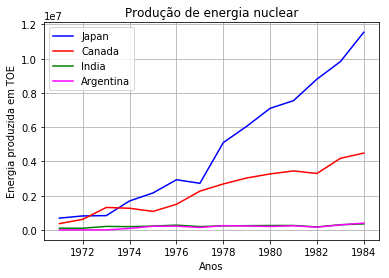

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


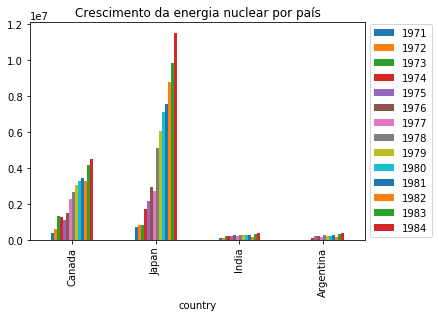

In [9]:
plt.plot(nuclear.loc['Japan'], 'blue', label = 'Japan')
plt.plot(nuclear.loc['Canada'], 'red', label = 'Canada')
plt.plot(nuclear.loc['India'], 'green', label = 'India')
plt.plot(nuclear.loc['Argentina'], 'magenta', label = 'Argentina')
plt.title('Produção de energia nuclear')
plt.xlabel('Anos')
plt.ylabel('Energia produzida em TOE')
plt.grid(True)
plt.legend()
plt.show()

nuclear.plot(kind='bar')
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Crescimento da energia nuclear por país')
plt.show()

Como pode ser observado no gráfico, a produção no Japão começou a crescer de forma significante a partir de 1973, um ano depois de seu ingresso, e a do Canadá passou a crescer no próprio ano de ingresso, 1975. Por outro lado, a Índia e a Argentina, que não entraram na NEA, mantiveram a produção quase que de forma estável e coincidente. Analisando essa variável isoladamente, a hipótese parece ser correta, mas outras informações precisam ser levadas em conta.

**Dados sobre a produção de energia a partir de petróleo (TOE)**

In [10]:
dados_oil = pd.read_excel('oil_energy.xlsx')
dados_oil.head(3)

,Oil Consumption total (tonnes per year),1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Algeria,1289000,1693000,1578000,1682000,1775000,2032000,2288000,2514000,2739000,...,9744000,10134000,10598000,11039396,11519500,12904556,14012890,14900000.0,14900000.0,NaN
1,Argentina,21952000,22678000,23224000,23733000,24671000,21942000,23491000,23162000,23189000,...,17107000,17558000,18401000,19676875,20555955,23192795,24219411,23700000.0,25700000.0,NaN
2,Australia,16902000,18120000,19812000,21892000,23425000,24451000,25803000,25784000,28206000,...,37970000,38275000,38791278,39838432,41414188,41732248,42461108,42200000.0,42600000.0,NaN


In [11]:
petroil = dados_oil.set_index('Oil Consumption total (tonnes per year)')
petroil.index.names = ['country']
petroil = petroil.iloc[:,6:20]
petroil

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,
Algeria,2288000,2514000,2739000,3036000,3378000,3877000,4400000,4521000,5420000,5469000,5889000,6245000,7011000,7760000
Argentina,23491000,23162000,23189000,23125000,21912000,22901000,23963000,23384000,25229000,22920000,21598000,20919000,21151000,21053000
Australia,25803000,25784000,28206000,29042000,28581000,29770000,31017000,30794000,31269000,29691000,29216000,28416000,27260000,28503000
Austria,10127000,10923000,11831000,10581000,10682000,11617000,11107000,11998000,12504000,12188000,11046000,10469000,10113000,9820000
Azerbaijan,-,-,-,-,-,-,-,-,-,-,-,-,-,-
Bangladesh,-,757000,876000,967000,1119000,1207000,1187000,1286000,1419000,1592000,1603000,1467000,1336000,1588000
Belarus,-,-,-,-,-,-,-,-,-,-,-,-,-,-
Brazil,27956617,32147765,39803983,42979446,44451496,47899835,49259178,54222043,57661934,56375581,53851339,54758250,53257560,54457372
Bulgaria,9889000,10282000,10849000,11284000,11965000,12431000,12927000,13315000,13726000,13972000,12457000,12064000,11634000,11167000


In [12]:
petroil = petroil.loc[['India','Japan','Canada','Argentina'],:]
petroil = petroil[~petroil[1971].isin(['-'])]
petroil = petroil.sort_values(by=1971, ascending = False)
petroil.insert(0,'organization',['faz parte','faz parte','não faz parte','não faz parte'])

In [13]:
petroil

,organization,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,,
Japan,faz parte,219669000,234362000,269071000,258948000,244014000,253471000,260376000,262666000,265110000,237679000,223935000,207820000,207189000,217954000
Canada,faz parte,73523000,77395000,81651000,83008000,81128000,85436000,86309000,87957000,91501000,90104000,84228000,75363000,70490000,71215000
Argentina,não faz parte,23491000,23162000,23189000,23125000,21912000,22901000,23963000,23384000,25229000,22920000,21598000,20919000,21151000,21053000
India,não faz parte,20475000,22091000,23314000,22834000,23347000,24593000,26413000,28717000,31004000,31633000,34036000,35403000,37223000,39934000


In [14]:
oil = petroil.iloc[:,1:]
oil

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,
Japan,219669000,234362000,269071000,258948000,244014000,253471000,260376000,262666000,265110000,237679000,223935000,207820000,207189000,217954000
Canada,73523000,77395000,81651000,83008000,81128000,85436000,86309000,87957000,91501000,90104000,84228000,75363000,70490000,71215000
Argentina,23491000,23162000,23189000,23125000,21912000,22901000,23963000,23384000,25229000,22920000,21598000,20919000,21151000,21053000
India,20475000,22091000,23314000,22834000,23347000,24593000,26413000,28717000,31004000,31633000,34036000,35403000,37223000,39934000


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


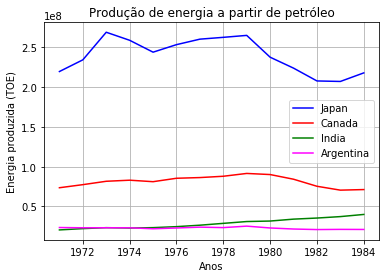

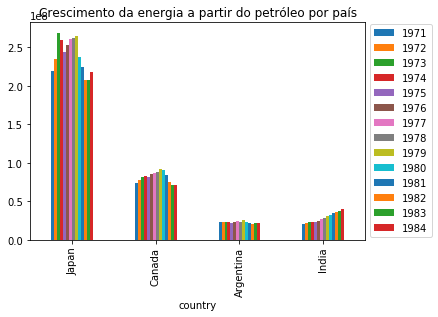

In [21]:
plt.plot(oil.loc['Japan'], 'blue', label = 'Japan')
plt.plot(oil.loc['Canada'], 'red', label = 'Canada')
plt.plot(oil.loc['India'], 'green', label = 'India')
plt.plot(oil.loc['Argentina'], 'magenta', label = 'Argentina')
plt.title('Produção de energia a partir de petróleo')
plt.xlabel('Anos')
plt.ylabel('Energia produzida (TOE)')
plt.grid(True)
plt.legend()

oil.plot(kind='bar')
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Crescimento da energia a partir do petróleo por país')
plt.show()

O gráfico acima demonstra que, dentre os países analisados, o Japão é o que foi mais afetado pela crise do petróleo. O motivo para isso é que esse país sofre de uma séria carência por fontes de combustíveis fósseis e, por isso, depende muito da importação desses recursos para a obtenção de energia. Com o aumento do preço do petróleo, o consumo caiu bruscamente em 1973, subindo de novo em 1975 (quando a crise já saía de seu ápice) e tendo uma nova queda em 1979 (terceiro momento da crise do petróleo, com a Revolução do Irã). Os outros países, por outro lado, não tiveram o consumo muito impactado por essas crises, tendo uma mudança não tão significante quanto a do Japão.

**Dados sobre a energia total usada por país (TOE)**

In [16]:
dados_energy_use_total = pd.read_excel('energy_use_total.xlsx')
dados_energy_use_total.head(3)

,"Energe use, total (toe)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
energy_use_t = dados_energy_use_total.set_index('Energe use, total (toe)')
energy_use_t = energy_use_t.iloc[:,11:25]
energy_use_t.index.names = ['country']
energy_use_t

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,1717818.0,1941633.0,1751543.0,1825619.0,1988411.0,2190349.0,2321677.0,2593840.0,2262329.0,3071557.0,2696615.0,2691515.0,2844307.0,2957473.0
Algeria,3467088.0,4023298.0,4825133.0,5189237.0,5523503.0,6303561.0,7055381.0,8686419.0,11003456.0,11208612.0,12185743.0,15872317.0,17152852.0,17000866.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,3850748.0,4145619.0,4130688.0,4219849.0,4120914.0,4072554.0,4015100.0,4416958.0,4478234.0,4563057.0,4593167.0,4530724.0,4656722.0,4704760.0
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
energy_use_t = energy_use_t[~energy_use_t[1971].isin(['NaN'])]
energy_use_t = energy_use_t.loc[['India','Japan','Canada','Argentina'],:]
energy_use_t = energy_use_t.sort_values(by=1971, ascending=False)
energy_use_t.insert(0,'organization',['faz parte','faz parte','não faz parte','não faz parte'])

In [19]:
energy_use_t

,organization,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,,
Japan,faz parte,267528465.0,285875407.0,320368660.0,322140756.0,305054335.0,324419709.0,330191794.0,333013333.0,352714403.0,344522706.0,336976512.0,336467940.0,336770462.0,362191060.0
India,faz parte,156464804.0,160128825.0,164473626.0,171376208.0,177729528.0,185060084.0,190216072.0,190959893.0,199922784.0,205154559.0,216022695.0,224639961.0,232102715.0,242206681.0
Canada,não faz parte,141352607.0,152495184.0,159345776.0,161708500.0,165946829.0,171035832.0,176317176.0,181203629.0,190277534.0,192608778.0,187802540.0,180461216.0,179535267.0,188707639.0
Argentina,não faz parte,33654963.0,34199156.0,35601624.0,36303336.0,35948219.0,37186387.0,38204614.0,38900253.0,41111993.0,41819769.0,40836332.0,41072833.0,41797670.0,43329179.0


In [22]:
energy_use_total = energy_use_t.iloc[:,1:]
energy_use_total

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,
Japan,267528465.0,285875407.0,320368660.0,322140756.0,305054335.0,324419709.0,330191794.0,333013333.0,352714403.0,344522706.0,336976512.0,336467940.0,336770462.0,362191060.0
India,156464804.0,160128825.0,164473626.0,171376208.0,177729528.0,185060084.0,190216072.0,190959893.0,199922784.0,205154559.0,216022695.0,224639961.0,232102715.0,242206681.0
Canada,141352607.0,152495184.0,159345776.0,161708500.0,165946829.0,171035832.0,176317176.0,181203629.0,190277534.0,192608778.0,187802540.0,180461216.0,179535267.0,188707639.0
Argentina,33654963.0,34199156.0,35601624.0,36303336.0,35948219.0,37186387.0,38204614.0,38900253.0,41111993.0,41819769.0,40836332.0,41072833.0,41797670.0,43329179.0


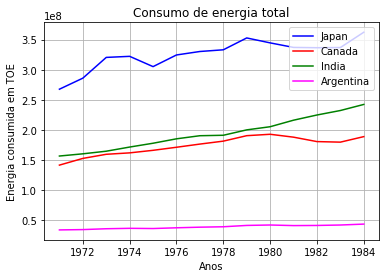

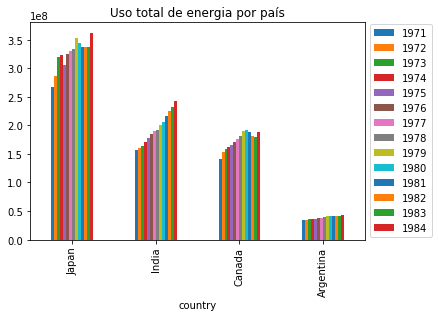

In [46]:
plt.plot(energy_use_total.loc['Japan'], 'blue', label = 'Japan')
plt.plot(energy_use_total.loc['Canada'], 'red', label = 'Canada')
plt.plot(energy_use_total.loc['India'], 'green', label = 'India')
plt.plot(energy_use_total.loc['Argentina'], 'magenta', label = 'Argentina')
plt.title('Consumo de energia total')
plt.xlabel('Anos')
plt.ylabel('Energia consumida em TOE')
plt.grid(True)
plt.yscale('linear')
plt.legend()

energy_use_total.plot(kind='bar')
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Uso total de energia por país')
plt.show()

O gráfico mostra que o consumo de energia teve um certo crescimento ao longo dos anos, o que faz completo sentido. Esse foi um período de desenvolvimento de novas tecnologias e expansão do uso da energia elétrica, o que exige uma grande quantia de energia. A Argentina foi o único país que não demonstrou um crescimento tão significante, mas o comportamento dos outros países comprova essa teoria.

**Dados sobre a energia total produzida por país (TOE)**

In [24]:
dados_energy_prod_total = pd.read_excel('energy_production_total.xlsx')
dados_energy_prod_total.head(3)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,883.0,959.0,1050.0,1150.0,1170.0,1190.0,1060.0,1150.0,1250.0,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,137000.0,143000.0,155000.0,158000.0,167000.0,165000.0,164000.0,162000.0,152000.0,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43500.0,51400.0,51400.0,57600.0,70900.0,80000.0,95100.0,106000.0,101000.0,NaN


In [25]:
energy_prod_total = dados_energy_prod_total.set_index('country')
energy_prod_total = energy_prod_total.iloc[:,11:25]
energy_prod_total

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,
Albania,2420.0,2960.0,3000.0,2710.0,2910.0,3080.0,3170.0,3480.0,3390.0,3430.0,2690.0,2650.0,2810.0,3010.0
Algeria,41500.0,54700.0,56500.0,53300.0,53000.0,58800.0,62100.0,69500.0,75800.0,65700.0,67200.0,67300.0,74100.0,77000.0
Angola,9120.0,10500.0,11700.0,12100.0,11400.0,11200.0,10700.0,10200.0,11000.0,11300.0,10300.0,10400.0,12900.0,14300.0
Argentina,30600.0,31000.0,30500.0,30900.0,30600.0,31000.0,32700.0,33900.0,36400.0,38800.0,39500.0,40000.0,42000.0,42900.0
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,53900.0,62400.0,68000.0,67500.0,75000.0,75300.0,82300.0,81600.0,86500.0,85400.0,97200.0,98600.0,107000.0,118000.0
Austria,7370.0,7330.0,7920.0,7820.0,7810.0,7240.0,7670.0,7830.0,8010.0,7630.0,7410.0,7490.0,7300.0,7350.0
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bahrain,10700.0,10100.0,10800.0,11500.0,9960.0,10300.0,12000.0,11700.0,12100.0,12000.0,13000.0,10600.0,9910.0,11100.0


In [26]:
energy_prod_total = energy_prod_total[~energy_prod_total[1971].isin(['NaN'])]
energy_prod_total = energy_prod_total.loc[['India','Japan','Canada','Argentina'],:]
energy_prod_total = energy_prod_total.sort_values(by=1971, ascending=False)
energy_prod_total

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984
country,,,,,,,,,,,,,,
Canada,156000.0,177000.0,198000.0,192000.0,188000.0,182000.0,190000.0,191000.0,210000.0,207000.0,201000.0,203000.0,207000.0,229000.0
India,142000.0,146000.0,149000.0,157000.0,166000.0,170000.0,174000.0,178000.0,181000.0,187000.0,200000.0,211000.0,222000.0,233000.0
Japan,35800.0,32600.0,29500.0,30600.0,29900.0,33000.0,32000.0,36200.0,39400.0,43300.0,44500.0,51800.0,55200.0,59300.0
Argentina,30600.0,31000.0,30500.0,30900.0,30600.0,31000.0,32700.0,33900.0,36400.0,38800.0,39500.0,40000.0,42000.0,42900.0


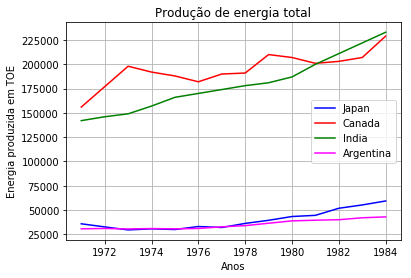

In [27]:
plt.plot(energy_prod_total.loc['Japan'], 'blue', label = 'Japan')
plt.plot(energy_prod_total.loc['Canada'], 'red', label = 'Canada')
plt.plot(energy_prod_total.loc['India'], 'green', label = 'India')
plt.plot(energy_prod_total.loc['Argentina'], 'magenta', label = 'Argentina')
plt.title('Produção de energia total')
plt.xlabel('Anos')
plt.ylabel('Energia produzida em TOE')
plt.grid(True)
plt.yscale('linear')
plt.legend()

Analisando os dados, foi concluído que essas informações sobre a produção total de energia terão de ser desconsideradas. Os números apresentados pelo arquivo do excel não são condinzentes com a realidade, são muito pequenos. Foi checado na base de dados e a medida de energia é a mesma que dos outros dados analisados no trabalho, mas os números não fazem sentido. É impossível que a produção total de energia dos países seja da ordem de grandeza apresentada na tabela, o que pode ser confirmado quando comparado com os outros dados de energia (que estão na mesma medida). Por falta de cridibilidade quanto a esses dados, eles não serão usados.

## • Comparando e entendendo os dados •

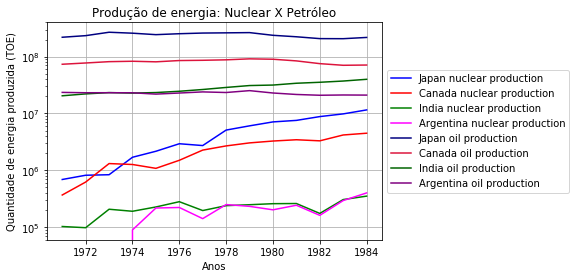

In [49]:
plt.plot(nuclear.loc['Japan'], 'blue', label = 'Japan nuclear production')
plt.plot(nuclear.loc['Canada'], 'red', label = 'Canada nuclear production')
plt.plot(nuclear.loc['India'], 'green', label = 'India nuclear production')
plt.plot(nuclear.loc['Argentina'], 'magenta', label = 'Argentina nuclear production')
plt.plot(oil.loc['Japan'], 'navy', label = 'Japan oil production')
plt.plot(oil.loc['Canada'], 'crimson', label = 'Canada oil production')
plt.plot(oil.loc['India'], 'darkgreen', label = 'India oil production')
plt.plot(oil.loc['Argentina'], 'purple', label = 'Argentina oil production')
plt.grid(True)
plt.title('Produção de energia: Nuclear X Petróleo')
plt.xlabel('Anos')
plt.ylabel('Quantidade de energia produzida (TOE)')
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')

In [29]:
percent_japan_nuc = (nuclear.loc['Japan'])/(energy_use_total.loc['Japan']) * 100
percent_japan_oil = (oil.loc['Japan'])/(energy_use_total.loc['Japan']) * 100

In [30]:
percent_canada_nuc = (nuclear.loc['Canada'])/(energy_use_total.loc['Canada']) * 100
percent_canada_oil = (oil.loc['Canada'])/(energy_use_total.loc['Canada']) * 100

In [31]:
percent_india_nuc = (nuclear.loc['India'])/(energy_use_total.loc['India']) * 100
percent_india_oil = (oil.loc['India'])/(energy_use_total.loc['India']) * 100

In [32]:
percent_argentina_nuc = (nuclear.loc['Argentina'])/(energy_use_total.loc['Argentina']) * 100
percent_argentina_oil = (oil.loc['Argentina'])/(energy_use_total.loc['Argentina']) * 100

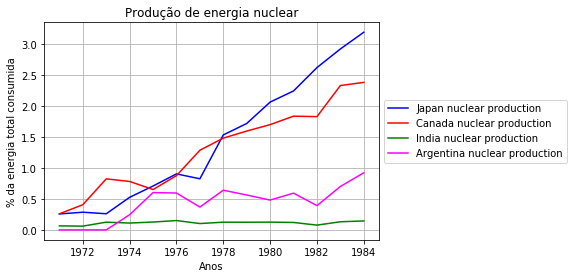

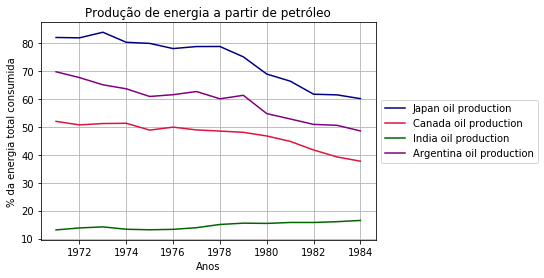

In [33]:
plt.plot(percent_japan_nuc,'blue', label = 'Japan nuclear production')
plt.plot(percent_canada_nuc, 'red', label = 'Canada nuclear production')
plt.plot(percent_india_nuc, 'green', label = 'India nuclear production')
plt.plot(percent_argentina_nuc, 'magenta', label = 'Argentina nuclear production')
plt.grid(True)
plt.title('Produção de energia nuclear')
plt.xlabel('Anos')
plt.ylabel('% da energia total consumida')
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('linear')
plt.show()


plt.plot(percent_japan_oil,'navy', label = 'Japan oil production')
plt.plot(percent_canada_oil, 'crimson', label = 'Canada oil production')
plt.plot(percent_india_oil, 'darkgreen', label = 'India oil production')
plt.plot(percent_argentina_oil, 'purple', label = 'Argentina oil production')
plt.grid(True)
plt.title('Produção de energia a partir de petróleo')
plt.xlabel('Anos')
plt.ylabel('% da energia total consumida')
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('linear')
plt.show()

Olhando os dois gráficos dessa forma, um embaixo do outro e com a mesma escala no eixo X, pode-se observar que há sim uma relação entre a baixa no uso do petróleo e o aumento da produção de energia nuclear. Contudo, o primeiro gráfico também fornece a informação de que os países que entraram na organização tiveram um crescimento bem mais significativo que os países de fora e a energia nuclear passou a representar um percentual maior da enrgia total consumida pelo país.

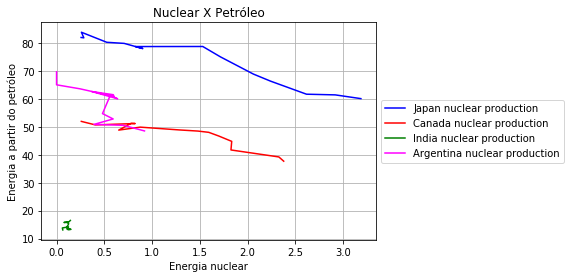

In [34]:
plt.plot(percent_japan_nuc,percent_japan_oil,'blue', label = 'Japan nuclear production')
plt.plot(percent_canada_nuc,percent_canada_oil, 'red', label = 'Canada nuclear production')
plt.plot(percent_india_nuc,percent_india_oil, 'green', label = 'India nuclear production')
plt.plot(percent_argentina_nuc,percent_argentina_oil, 'magenta', label = 'Argentina nuclear production')
plt.grid(True)
plt.title('Nuclear X Petróleo')
plt.xlabel('Energia nuclear')
plt.ylabel('Energia a partir do petróleo')
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('linear')
plt.show()

Ilegível, muito difícil de entender.

Text(0.5, 1.0, 'Produção de energia nuclear')

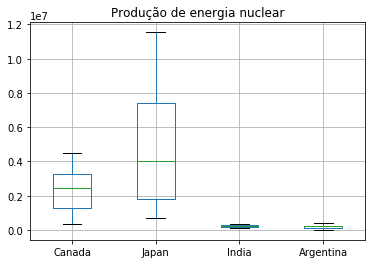

In [35]:
eita = nuclear.transpose()
eita.boxplot()
plt.title('Produção de energia nuclear')

Não passa nenhuma informação nova, a série temporal passa a informação de forma mais visualizável.

In [36]:
nuke_japan = pd.DataFrame(nuclear.loc['Japan'].transpose())
oil_japan = pd.DataFrame(oil.loc['Japan'].transpose())
use_japan = pd.DataFrame(energy_use_total.loc['Japan'].transpose())
df = nuke_japan.join(oil_japan, how='inner', lsuffix='_nuclear', rsuffix='_oil')
df = df.join(use_japan, how='inner', rsuffix='_energy_use')
df.rename(columns={'Japan':'Japan_energy_use'}, inplace=True)
df

,Japan_nuclear,Japan_oil,Japan_energy_use
1971,6.878762e+05,219669000,267528465.0
1972,8.168530e+05,234362000,285875407.0
1973,8.346518e+05,269071000,320368660.0
1974,1.693809e+06,258948000,322140756.0
1975,2.160361e+06,244014000,305054335.0
1976,2.930267e+06,253471000,324419709.0
1977,2.722184e+06,260376000,330191794.0
1978,5.100000e+06,262666000,333013333.0
1979,6.052709e+06,265110000,352714403.0
1980,7.101548e+06,237679000,344522706.0


In [37]:
nuke_canada = pd.DataFrame(nuclear.loc['Canada'].transpose())
oil_canada = pd.DataFrame(oil.loc['Canada'].transpose())
use_canada = pd.DataFrame(energy_use_total.loc['Canada'].transpose())
df = df.join(nuke_canada, how='inner')
df = df.join(oil_canada, how='inner', lsuffix='_nuclear', rsuffix='_oil')
df = df.join(use_canada, how='inner', rsuffix='_energy_use')
df.rename(columns={'Canada':'Canada_energy_use'}, inplace=True)
df

,Japan_nuclear,Japan_oil,Japan_energy_use,Canada_nuclear,Canada_oil,Canada_energy_use
1971,6.878762e+05,219669000,267528465.0,3.668960e+05,73523000,141352607.0
1972,8.168530e+05,234362000,285875407.0,6.200344e+05,77395000,152495184.0
1973,8.346518e+05,269071000,320368660.0,1.311608e+06,81651000,159345776.0
1974,1.693809e+06,258948000,322140756.0,1.263629e+06,83008000,161708500.0
1975,2.160361e+06,244014000,305054335.0,1.080825e+06,81128000,165946829.0
1976,2.930267e+06,253471000,324419709.0,1.497506e+06,85436000,171035832.0
1977,2.722184e+06,260376000,330191794.0,2.265004e+06,86309000,176317176.0
1978,5.100000e+06,262666000,333013333.0,2.682889e+06,87957000,181203629.0
1979,6.052709e+06,265110000,352714403.0,3.032760e+06,91501000,190277534.0
1980,7.101548e+06,237679000,344522706.0,3.270163e+06,90104000,192608778.0


In [38]:
nuke_india = pd.DataFrame(nuclear.loc['India'].transpose())
oil_india = pd.DataFrame(oil.loc['India'].transpose())
use_india = pd.DataFrame(energy_use_total.loc['India'].transpose())
df = df.join(nuke_india, how='inner')
df = df.join(oil_india, how='inner', lsuffix='_nuclear', rsuffix='_oil')
df = df.join(use_india, how='inner', rsuffix='_energy_use')
df.rename(columns={'India':'India_energy_use'}, inplace=True)
df

,Japan_nuclear,Japan_oil,Japan_energy_use,Canada_nuclear,Canada_oil,Canada_energy_use,India_nuclear,India_oil,India_energy_use
1971,6.878762e+05,219669000,267528465.0,3.668960e+05,73523000,141352607.0,102321.582115,20475000,156464804.0
1972,8.168530e+05,234362000,285875407.0,6.200344e+05,77395000,152495184.0,97420.464316,22091000,160128825.0
1973,8.346518e+05,269071000,320368660.0,1.311608e+06,81651000,159345776.0,206018.916595,23314000,164473626.0
1974,1.693809e+06,258948000,322140756.0,1.263629e+06,83008000,161708500.0,189681.857266,22834000,171376208.0
1975,2.160361e+06,244014000,305054335.0,1.080825e+06,81128000,165946829.0,225795.356836,23347000,177729528.0
1976,2.930267e+06,253471000,324419709.0,1.497506e+06,85436000,171035832.0,279621.668100,24593000,185060084.0
1977,2.722184e+06,260376000,330191794.0,2.265004e+06,86309000,176317176.0,195356.835770,26413000,190216072.0
1978,5.100000e+06,262666000,333013333.0,2.682889e+06,87957000,181203629.0,238177.128117,28717000,190959893.0
1979,6.052709e+06,265110000,352714403.0,3.032760e+06,91501000,190277534.0,247377.472055,31004000,199922784.0
1980,7.101548e+06,237679000,344522706.0,3.270163e+06,90104000,192608778.0,258039.552880,31633000,205154559.0


In [39]:
nuke_argentina = pd.DataFrame(nuclear.loc['Argentina'].transpose())
oil_argentina = pd.DataFrame(oil.loc['Argentina'].transpose())
use_argentina = pd.DataFrame(energy_use_total.loc['Argentina'].transpose())
df = df.join(nuke_argentina, how='inner')
df = df.join(oil_argentina, how='inner', lsuffix='_nuclear', rsuffix='_oil')
df = df.join(use_argentina, how='inner', rsuffix='_energy_use')
df.rename(columns={'Argentina':'Argentina_energy_use'}, inplace=True)
df

,Japan_nuclear,Japan_oil,Japan_energy_use,Canada_nuclear,Canada_oil,Canada_energy_use,India_nuclear,India_oil,India_energy_use,Argentina_nuclear,Argentina_oil,Argentina_energy_use
1971,6.878762e+05,219669000,267528465.0,3.668960e+05,73523000,141352607.0,102321.582115,20475000,156464804.0,0.000000,23491000,33654963.0
1972,8.168530e+05,234362000,285875407.0,6.200344e+05,77395000,152495184.0,97420.464316,22091000,160128825.0,0.000000,23162000,34199156.0
1973,8.346518e+05,269071000,320368660.0,1.311608e+06,81651000,159345776.0,206018.916595,23314000,164473626.0,0.000000,23189000,35601624.0
1974,1.693809e+06,258948000,322140756.0,1.263629e+06,83008000,161708500.0,189681.857266,22834000,171376208.0,89079.965606,23125000,36303336.0
1975,2.160361e+06,244014000,305054335.0,1.080825e+06,81128000,165946829.0,225795.356836,23347000,177729528.0,216423.043852,21912000,35948219.0
1976,2.930267e+06,253471000,324419709.0,1.497506e+06,85436000,171035832.0,279621.668100,24593000,185060084.0,221152.192605,22901000,37186387.0
1977,2.722184e+06,260376000,330191794.0,2.265004e+06,86309000,176317176.0,195356.835770,26413000,190216072.0,140756.663801,23963000,38204614.0
1978,5.100000e+06,262666000,333013333.0,2.682889e+06,87957000,181203629.0,238177.128117,28717000,190959893.0,249011.177988,23384000,38900253.0
1979,6.052709e+06,265110000,352714403.0,3.032760e+06,91501000,190277534.0,247377.472055,31004000,199922784.0,231470.335340,25229000,41111993.0
1980,7.101548e+06,237679000,344522706.0,3.270163e+06,90104000,192608778.0,258039.552880,31633000,205154559.0,201203.783319,22920000,41819769.0


In [40]:
df_japan = df.iloc[:,0:3]
df_japan

,Japan_nuclear,Japan_oil,Japan_energy_use
1971,6.878762e+05,219669000,267528465.0
1972,8.168530e+05,234362000,285875407.0
1973,8.346518e+05,269071000,320368660.0
1974,1.693809e+06,258948000,322140756.0
1975,2.160361e+06,244014000,305054335.0
1976,2.930267e+06,253471000,324419709.0
1977,2.722184e+06,260376000,330191794.0
1978,5.100000e+06,262666000,333013333.0
1979,6.052709e+06,265110000,352714403.0
1980,7.101548e+06,237679000,344522706.0


In [41]:
df_canada = df.iloc[:,3:6]
df_canada

,Canada_nuclear,Canada_oil,Canada_energy_use
1971,3.668960e+05,73523000,141352607.0
1972,6.200344e+05,77395000,152495184.0
1973,1.311608e+06,81651000,159345776.0
1974,1.263629e+06,83008000,161708500.0
1975,1.080825e+06,81128000,165946829.0
1976,1.497506e+06,85436000,171035832.0
1977,2.265004e+06,86309000,176317176.0
1978,2.682889e+06,87957000,181203629.0
1979,3.032760e+06,91501000,190277534.0
1980,3.270163e+06,90104000,192608778.0


In [42]:
df_india = df.iloc[:,6:9]
df_india

,India_nuclear,India_oil,India_energy_use
1971,102321.582115,20475000,156464804.0
1972,97420.464316,22091000,160128825.0
1973,206018.916595,23314000,164473626.0
1974,189681.857266,22834000,171376208.0
1975,225795.356836,23347000,177729528.0
1976,279621.668100,24593000,185060084.0
1977,195356.835770,26413000,190216072.0
1978,238177.128117,28717000,190959893.0
1979,247377.472055,31004000,199922784.0
1980,258039.552880,31633000,205154559.0


In [43]:
df_argentina = df.iloc[:,9:12]
df_argentina

,Argentina_nuclear,Argentina_oil,Argentina_energy_use
1971,0.000000,23491000,33654963.0
1972,0.000000,23162000,34199156.0
1973,0.000000,23189000,35601624.0
1974,89079.965606,23125000,36303336.0
1975,216423.043852,21912000,35948219.0
1976,221152.192605,22901000,37186387.0
1977,140756.663801,23963000,38204614.0
1978,249011.177988,23384000,38900253.0
1979,231470.335340,25229000,41111993.0
1980,201203.783319,22920000,41819769.0


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


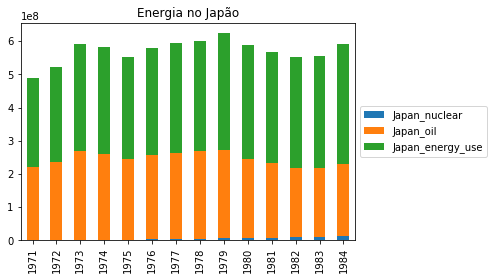

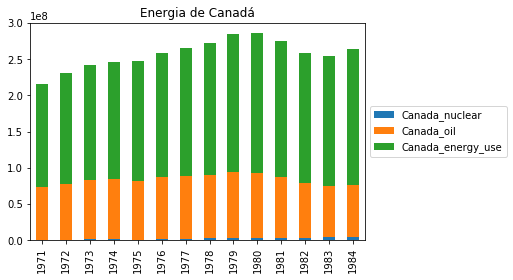

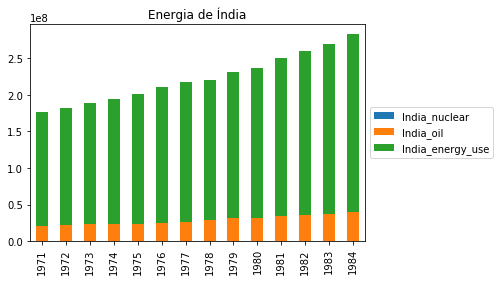

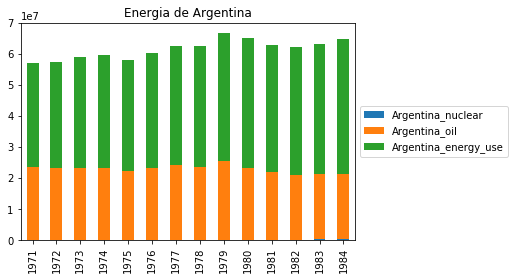

In [44]:
df_japan.plot(kind='bar', stacked=True)
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Energia no Japão')
plt.show()

df_canada.plot(kind='bar', stacked=True)
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Energia de Canadá')
plt.show()

df_india.plot(kind='bar', stacked=True)
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Energia de Índia')
plt.show()

df_argentina.plot(kind='bar', stacked=True)
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Energia de Argentina')
plt.show()

## • Conclusão •

só no oficial

## • Base de dados e referências •

> https://www.gapminder.org/data/

> https://en.wikipedia.org/wiki/Nuclear_Energy_Agency

> https://www.oecd-nea.org/general/about/

> https://www.oecd-nea.org/general/history/timeline.html

> https://www.infoescola.com/economia/crise-do-petroleo/

> https://guiadoestudante.abril.com.br/estudo/resumo-de-geografia-fontes-energeticas-e-suas-relacoes-economicas/

> https://pt.wikipedia.org/wiki/Energia_no_Japão

> https://www.colegioweb.com.br/revolucao-industrial/as-tres-revolucoes-industriais.html